In [199]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

In [200]:
bulldozer = "audio/bulldozer_wav"
dump_truck = "audio/dump_truck_wav"
SAMPLE_RATE = 44100
duration = 4


In [201]:
# For single Folder Folder
def read_audio_files(path, sample_rate):
    signals = []
    mfcc_list = []
    files = os.listdir(path)
    for item in files:
        if item.endswith('.wav'):
            files = os.path.join(path, item)
            y, sr = librosa.load(files, sr=sample_rate)
            signals.append(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=30)
            mfcc_list.append(mfcc)
            
    return np.array(signals), np.array(mfcc_list), sr

In [202]:
# Bulldozer wav values
bulldozer_signal, bulldozer_mfcc, sr = read_audio_files(bulldozer, SAMPLE_RATE)
print(bulldozer_signal.shape, bulldozer_mfcc.shape, sr)

(10, 218880) (10, 30, 428) 44100


In [203]:
# Dump Truck wav values
dump_truck_signal, dump_truck_mfcc, sr = read_audio_files(dump_truck, SAMPLE_RATE)
print(dump_truck_signal.shape, dump_truck_mfcc.shape, sr)

(10, 218880) (10, 30, 428) 44100


In [204]:
# Add both equipment signal
mixed_signal_list = []

for i in range(len(bulldozer_mfcc)):
    mixed_signals = 0.1*(bulldozer_mfcc[i] + dump_truck_mfcc[i])
    mixed_signal_list.append(mixed_signals)

mixed_signal_array = np.array(mixed_signal_list)
print(mixed_signal_array.shape)

(10, 30, 428)


In [205]:
labels = [[1, 0, 1]]
label_list = []
for l in range(len(mixed_signal_array)):
    label = labels[0]
    label_list.append(label)


label_list_array = np.array(label_list)
print(label_list_array.shape)
    
    

(10, 3)


In [206]:
Audio(bulldozer_signal[0], rate=SAMPLE_RATE)

In [207]:
Audio(dump_truck_signal[0], rate=SAMPLE_RATE)

In [167]:
Audio(mixed_signal_array[0], rate=SAMPLE_RATE)

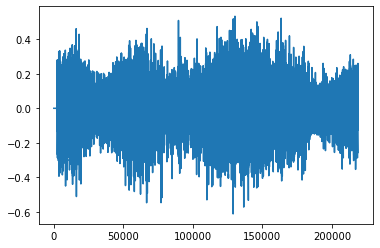

In [168]:
# Let's plot
plt.plot(bulldozer_signal[0])

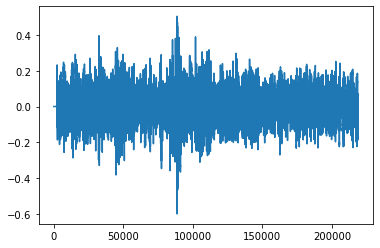

In [169]:
# Let's plot
plt.plot(dump_truck_signal[0])

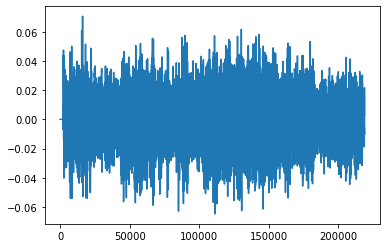

In [170]:
# Let's plot
plt.plot(mixed_signal_array[0])

In [171]:
from scipy.io.wavfile import write

output_dir = "audio/mixed"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
# for j in mixed_signal_array:
# #     print(j)
    
    

In [172]:
import numpy as np
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(mixed_signal_array, label_list_array, test_size=0.2, random_state=42, shuffle=True)

In [174]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8, 218880)
(8, 3)
(2, 218880)
(2, 3)


In [176]:
print(y_test[0])

[1 0 1]


In [177]:
dataset_mixed_signal = list(zip(mixed_signal_array, label_list_array))
print(dataset_mixed_signal)

[(array([ 0.        ,  0.        ,  0.        , ..., -0.0083313 ,
       -0.00748901, -0.00582886], dtype=float32), array([1, 0, 1])), (array([ 0.        ,  0.        ,  0.        , ..., -0.00934143,
       -0.00986328, -0.01065979], dtype=float32), array([1, 0, 1])), (array([0.        , 0.        , 0.        , ..., 0.01888123, 0.01794739,
       0.01746826], dtype=float32), array([1, 0, 1])), (array([ 0.        ,  0.        ,  0.        , ..., -0.01789551,
       -0.01559753, -0.01131592], dtype=float32), array([1, 0, 1])), (array([0.        , 0.        , 0.        , ..., 0.00549316, 0.00282898,
       0.00106812], dtype=float32), array([1, 0, 1])), (array([ 0.        ,  0.        ,  0.        , ..., -0.02925415,
       -0.03101196, -0.03290405], dtype=float32), array([1, 0, 1])), (array([0.        , 0.        , 0.        , ..., 0.00570068, 0.00411377,
       0.00029907], dtype=float32), array([1, 0, 1])), (array([0.        , 0.        , 0.        , ..., 0.01164551, 0.00957642,
      